In [1]:
import sys
sys.path.insert(0, ".")
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from bs4 import BeautifulSoup
import datetime
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.firefox.options import Options
from utils.instalogger import InstaLogger
import pdb
from selenium.webdriver.support.ui import Select
import requests
from os.path  import basename, join

In [2]:


def get_html_(url):
    # sleep(0.5)
    k = 0
    page = ""
    while page == '':
        try:
            headers = {
                'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.84 Safari/537.36'}
            page = requests.get(url, headers=headers)
            print(page.text)
            return page.text
            break
        except Exception as ex:
            print(ex)
            k += 1
            print("Connection refused by the doctor server..")
            print("Let me sleep for 10 seconds")
            print("ZZzzzz...")
            sleep(10)
            # print("Was a nice sleep, now let me continue...")
            continue


def get_info(html):
    image_folder = r'/home/anhlbt/Downloads/3axis'
    dictionary = []
    # dic={}

    # x=(html.find("<table class=\"detail-view table table-striped table-condensed\" id=\"yw1\">"))
    # html1=html[x:-1]
    #
    # try:
    soup1 = BeautifulSoup(html, "lxml")
    #     soup2 = BeautifulSoup(html1,"lxml")
    soup1 = soup1.find("div", class_="container fix-height").findAll("div", class_="book-container")
    for i in soup1:
        dictionary.append("https://english-e-reader.net" + i.find("a").get("href"))
        img_link = "https://english-e-reader.net" + i.find("img").get("src")
        with open(join(image_folder,basename(img_link)), "wb") as f:
            f.write(requests.get(img_link).content)
    return dictionary

def get_img_cover(html):
    image_folder = r'/home/anhlbt/Downloads/3axis'
    dictionary = []
    soup1 = BeautifulSoup(html, "lxml")
    soup1 = soup1.findAll("div", class_="book-container")
    for i in soup1:
        img_link = "https://english-e-reader.net" + i.find("img").get("src")
        dictionary.append(img_link)
        with open(join(image_folder,basename(img_link)), "wb") as f:
            f.write(requests.get(img_link).content)
    return dictionary    

def get_files(url):
    croll_by_Y = 400
    js_string = '''var tmp = document.elementFromPoint({0}, {1});  \
                    mutex = true; \
                    tmp.click();'''
    js_check_location = '''\
            function printMousePos(event) {\
                alert("clientX: " + event.clientX + " - clientY: " + event.clientY) }\
            document.addEventListener("click", printMousePos);'''
            
    js_download='''$( "button.btn.btn-danger" ).click(
			function( event ) {
				var target = event.target;
                
				var downloadID = ( new Date() ).getTime();
                target.setAttribute('href', "downloadFileByFormat('mp3')");
				//target.href += ( "?downloadID=" + downloadID );
				var cookiePattern = new RegExp( ( "downloadID=" + downloadID ), "i" );
                console.log(cookiePattern)
                
				var cookieTimer = setInterval( checkCookies, 500 );
				function checkCookies() {
					if ( document.cookie.search( cookiePattern ) >= 0 ) {
						clearInterval( cookieTimer );
						console.log( "Download complete!!" );
						return(
							console.log( "Download complete!!" )
						);
					}
					console.log(
						"File still downloading...",
						new Date().getTime(),
                        document.cookie.split(";")

					);
				}
			}
		);

    '''
    
    # 
    # document.cookie.search( "/downloadID=1593836174248/i" )
    chrome_options = Options()
    chrome_options.add_argument('--dns-prefetch-disable')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--lang=en-US')
    # chrome_options.add_argument('--headless')
    chrome_options.add_argument('window-size=1920x1200')
    downloadFilepath = '~/Downloads/english_reader'
    prefs = {'profile.default_content_setting_values.automatic_downloads': 1,\
        "profile.default_content_settings.popups":0, \
            "download.default_directory": downloadFilepath,\
         'intl.accept_languages': 'en-US'}
    chrome_options.add_experimental_option('prefs',prefs) 
    chrome_options.add_experimental_option("excludeSwitches", ['enable-automation']);
    # browser = geckodriver 
    # browser= webdriver.Firefox(options=chrome_options)
    browser = webdriver.Chrome('./ebook_crawler/assets/chromedriver', options=chrome_options)    
    # makes sure slower connections work as well        
    print ("Waiting 10 sec")
    browser.implicitly_wait(1)   
    
    try:
        browser.get(url)
    except Exception as e:
        print(e)
        browser.quit()
        
    try:
        browser.implicitly_wait(2)
        
        window_size = browser.get_window_size()
        browser.maximize_window()
        # browser.execute_script(js_download)
        browser.execute_script("window.scrollTo(0, {0});".format(croll_by_Y))
        browser.implicitly_wait(3)
        actions = ActionChains(browser)
        
        
        dismiss_cookie = browser.find_element_by_xpath('/html/body/div[1]/div/a')
        browser.execute_script(js_string.format(int(dismiss_cookie.rect['x'])+ 5, int(dismiss_cookie.rect['y']) + 5 - croll_by_Y))
        browser.implicitly_wait(3)
        # actions.click(dismiss_cookie).perform()
        

        # browser.execute_script(js_string.format(854, 463))
        el2 = browser.find_element_by_xpath('//*[@id="dropdown"]/div/button[2]') #choose ebook format
        browser.execute_script(js_string.format(int(el2.rect['x'])+ 5, int(el2.rect['y']) + 5 - croll_by_Y))
        browser.implicitly_wait(3)
        # actions.click(el2).perform()
        # actions.click()
  
        # browser.execute_script(js_string.format(821, 613))
        el3 = browser.find_element_by_xpath('//*[@id="dropdown"]/div/ul/li[5]/a') # select txt format
        browser.execute_script(js_string.format(int(el3.rect['x'])+ 5, int(el3.rect['y']) + 5 - croll_by_Y))
        # actions.click(el3).perform()
        
        # browser.execute_script(js_string.format(791, 475))
        el4 = browser.find_element_by_xpath('//*[@id="download"]') #download txt book
        browser.execute_script(js_string.format(int(el4.rect['x'])+ 5, int(el4.rect['y']) + 5 - croll_by_Y))
        # actions.click(el4).perform()
        # browser.execute_script(js_download)
  
        
        try:
            audio = browser.find_element_by_xpath('/html/body/div[3]/div/div[1]/div[2]/div[8]/a') # download audio
        except Exception as ex:
            print(ex)
            try:
                audio =  browser.find_element_by_xpath("/html/body/div[3]/div/div[1]/div[2]/div[8]/div[1]/button[1]")
            except Exception as ex:
                print(ex)
                InstaLogger.logger().warn('link: %s, no have audio file' %(url))
        if (audio):        
            browser.execute_script(js_string.format(int(audio.rect['x'])+ 5, int(audio.rect['y']) + 5 - croll_by_Y))
   
            
        InstaLogger.logger().info('link: %s' %(url))
        

    except Exception as e:
        print(e)
    finally:
        
        print("close browser after 200s....")
        sleep(200)
        
        browser.delete_all_cookies()
        browser.close()
        # browser.quit()

if __name__ == "__main__":
    print("begin...")

#     html = get_html_("https://english-e-reader.net/level/elementary")
#     get_img_cover(html)
    # links = (get_info(html))
    # for index,i in enumerate(links):
    #     print(i, "\n{} from {}".format(str(index+1),str(len(links))))
    #     get_files(i)
        


    # pdb.set_trace()
    # get_files('https://english-e-reader.net/book/muhammad-ali-b-smith')
        # 



begin...


<!doctype html><html lang="en-US">
<head>
<style id="litespeed-optm-css-rules">.link-parent,h1.resp{text-align:center}body{color:#333;font-family:"Segoe UI","Helvetica Neue",sans-serif;margin:50px 0 0;padding:0}.topheader{height:50px;background:#fff;position:fixed;top:0;left:0;width:100%;box-sizing:border-box;z-index:800;font-size:14px;color:#fff;box-shadow:0 1px 0 0 rgba(0,0,0,.12)}.topheader #logo{float:left;padding: 8px 8px 0 10px;}h1,h2{font-weight:500}.post-item{padding:9px;cursor:default;margin:5px;width:236px;background-color:#fff;border-radius:5px}.post-item:after{content:"";display:table;clear:both}.clear,.clear:after,.img a,.post-avatar{display:block}.post-item:hover{background:#d8d8d8}h2{font-size:16px;margin:0}a{text-decoration:none;color:#262B33}h1{font-size:1.71428571em;font-style:inherit;letter-spacing:-.01em;line-height:1.16666667;color:#333;margin:5px 0}.main-data h1.resp{text-align:left}#footer,.wp-pagenavi,h2.desc{text-align:center}h2.desc{color:#777;font:13px/15px A
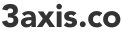

In [3]:
html = get_html_("https://3axis.co/dxf-files/")

In [4]:
image_folder = r'/home/anhlbt/Downloads/3axis'
dictionary = []

soup1 = BeautifulSoup(html, "lxml")
#     soup2 = BeautifulSoup(html1,"lxml")
soup1 = soup1.find("div", class_="cont").findAll("div", class_="post-item")

AttributeError: 'NoneType' object has no attribute 'findAll'

In [5]:
soup1

[<div class="post-item">
 <div class="img">
 <a href="https://3axis.co/laser-cut-wooden-mobile-phone-stand-cell-phone-holder-4mm-dxf-file/r1z2k921">
 <img alt="Laser Cut Wooden Mobile Phone Stand Cell Phone Holder 4mm DXF File" class="post-avatar" height="141" src="https://cdn.3axis.co/user-images/r1z2k921_thumb.jpg" width="236"/>
 </a>
 </div>
 <div class="data">
 <div class="format">Format: <b>dxf</b></div>
 <h2 class="post-subject"><a href="https://3axis.co/laser-cut-wooden-mobile-phone-stand-cell-phone-holder-4mm-dxf-file/r1z2k921">Laser Cut Wooden Mobile Phone Stand Cell Phone Holder 4mm DXF File</a></h2>
 </div>
 </div>,
 <div class="post-item">
 <div class="img">
 <a href="https://3axis.co/laser-cut-star-mandala-3d-illusion-lamp-3d-night-light-dxf-file/lopqj3z7">
 <img alt="Laser Cut Star Mandala 3D Illusion Lamp 3D Night Light DXF File" class="post-avatar" height="236" src="https://cdn.3axis.co/user-images/lopqj3z7_thumb.jpg" width="236"/>
 </a>
 </div>
 <div class="data">
 <di

In [4]:
print(requests.__version__)

2.22.0


In [5]:
res = requests.get('https://3axis.co/download/joedgx91/')

In [6]:
res.encoding

'UTF-8'

'<!doctype html><html lang="en-US">\n<head>\n<style id="litespeed-optm-css-rules">.link-parent,h1.resp{text-align:center}body{color:#333;font-family:"Segoe UI","Helvetica Neue",sans-serif;margin:50px 0 0;padding:0}.topheader{height:50px;background:#fff;position:fixed;top:0;left:0;width:100%;box-sizing:border-box;z-index:800;font-size:14px;color:#fff;box-shadow:0 1px 0 0 rgba(0,0,0,.12)}.topheader #logo{float:left;padding: 8px 8px 0 10px;}h1,h2{font-weight:500}.post-item{padding:9px;cursor:default;margin:5px;width:236px;background-color:#fff;border-radius:5px}.post-item:after{content:"";display:table;clear:both}.clear,.clear:after,.img a,.post-avatar{display:block}.post-item:hover{background:#d8d8d8}h2{font-size:16px;margin:0}a{text-decoration:none;color:#262B33}h1{font-size:1.71428571em;font-style:inherit;letter-spacing:-.01em;line-height:1.16666667;color:#333;margin:5px 0}.main-data h1.resp{text-align:left}#footer,.wp-pagenavi,h2.desc{text-align:center}h2.desc{color:#777;font:13px/15p
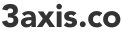

In [8]:
res.text